In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pyplot
from sklearn.preprocessing import LabelEncoder


dataset = pd.read_csv("diabetes_prediction_dataset.csv")

    
#Converter strings male e female pra numeros
gender_mapping = {
    "Female" : 0.0,
    "Male" : 1.0
}
dataset['gender'] = dataset["gender"].map(gender_mapping)



#Converrter strings de smoking history 
le = LabelEncoder()
dataset['smoking_history'] = le.fit_transform(dataset['smoking_history'])

dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,4,25.19,6.6,140,0
1,0.0,54.0,0,0,0,27.32,6.6,80,0
2,1.0,28.0,0,0,4,27.32,5.7,158,0
3,0.0,36.0,0,0,1,23.45,5.0,155,0
4,1.0,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0,0,0,27.32,6.2,90,0
99996,0.0,2.0,0,0,0,17.37,6.5,100,0
99997,1.0,66.0,0,0,3,27.83,5.7,155,0
99998,0.0,24.0,0,0,4,35.42,4.0,100,0


array([[<Axes: xlabel='gender', ylabel='gender'>,
        <Axes: xlabel='age', ylabel='gender'>,
        <Axes: xlabel='hypertension', ylabel='gender'>,
        <Axes: xlabel='heart_disease', ylabel='gender'>,
        <Axes: xlabel='smoking_history', ylabel='gender'>,
        <Axes: xlabel='bmi', ylabel='gender'>,
        <Axes: xlabel='HbA1c_level', ylabel='gender'>,
        <Axes: xlabel='blood_glucose_level', ylabel='gender'>,
        <Axes: xlabel='diabetes', ylabel='gender'>],
       [<Axes: xlabel='gender', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='hypertension', ylabel='age'>,
        <Axes: xlabel='heart_disease', ylabel='age'>,
        <Axes: xlabel='smoking_history', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='HbA1c_level', ylabel='age'>,
        <Axes: xlabel='blood_glucose_level', ylabel='age'>,
        <Axes: xlabel='diabetes', ylabel='age'>],
       [<Axes: xlabel='gender', ylabel='hypertension'

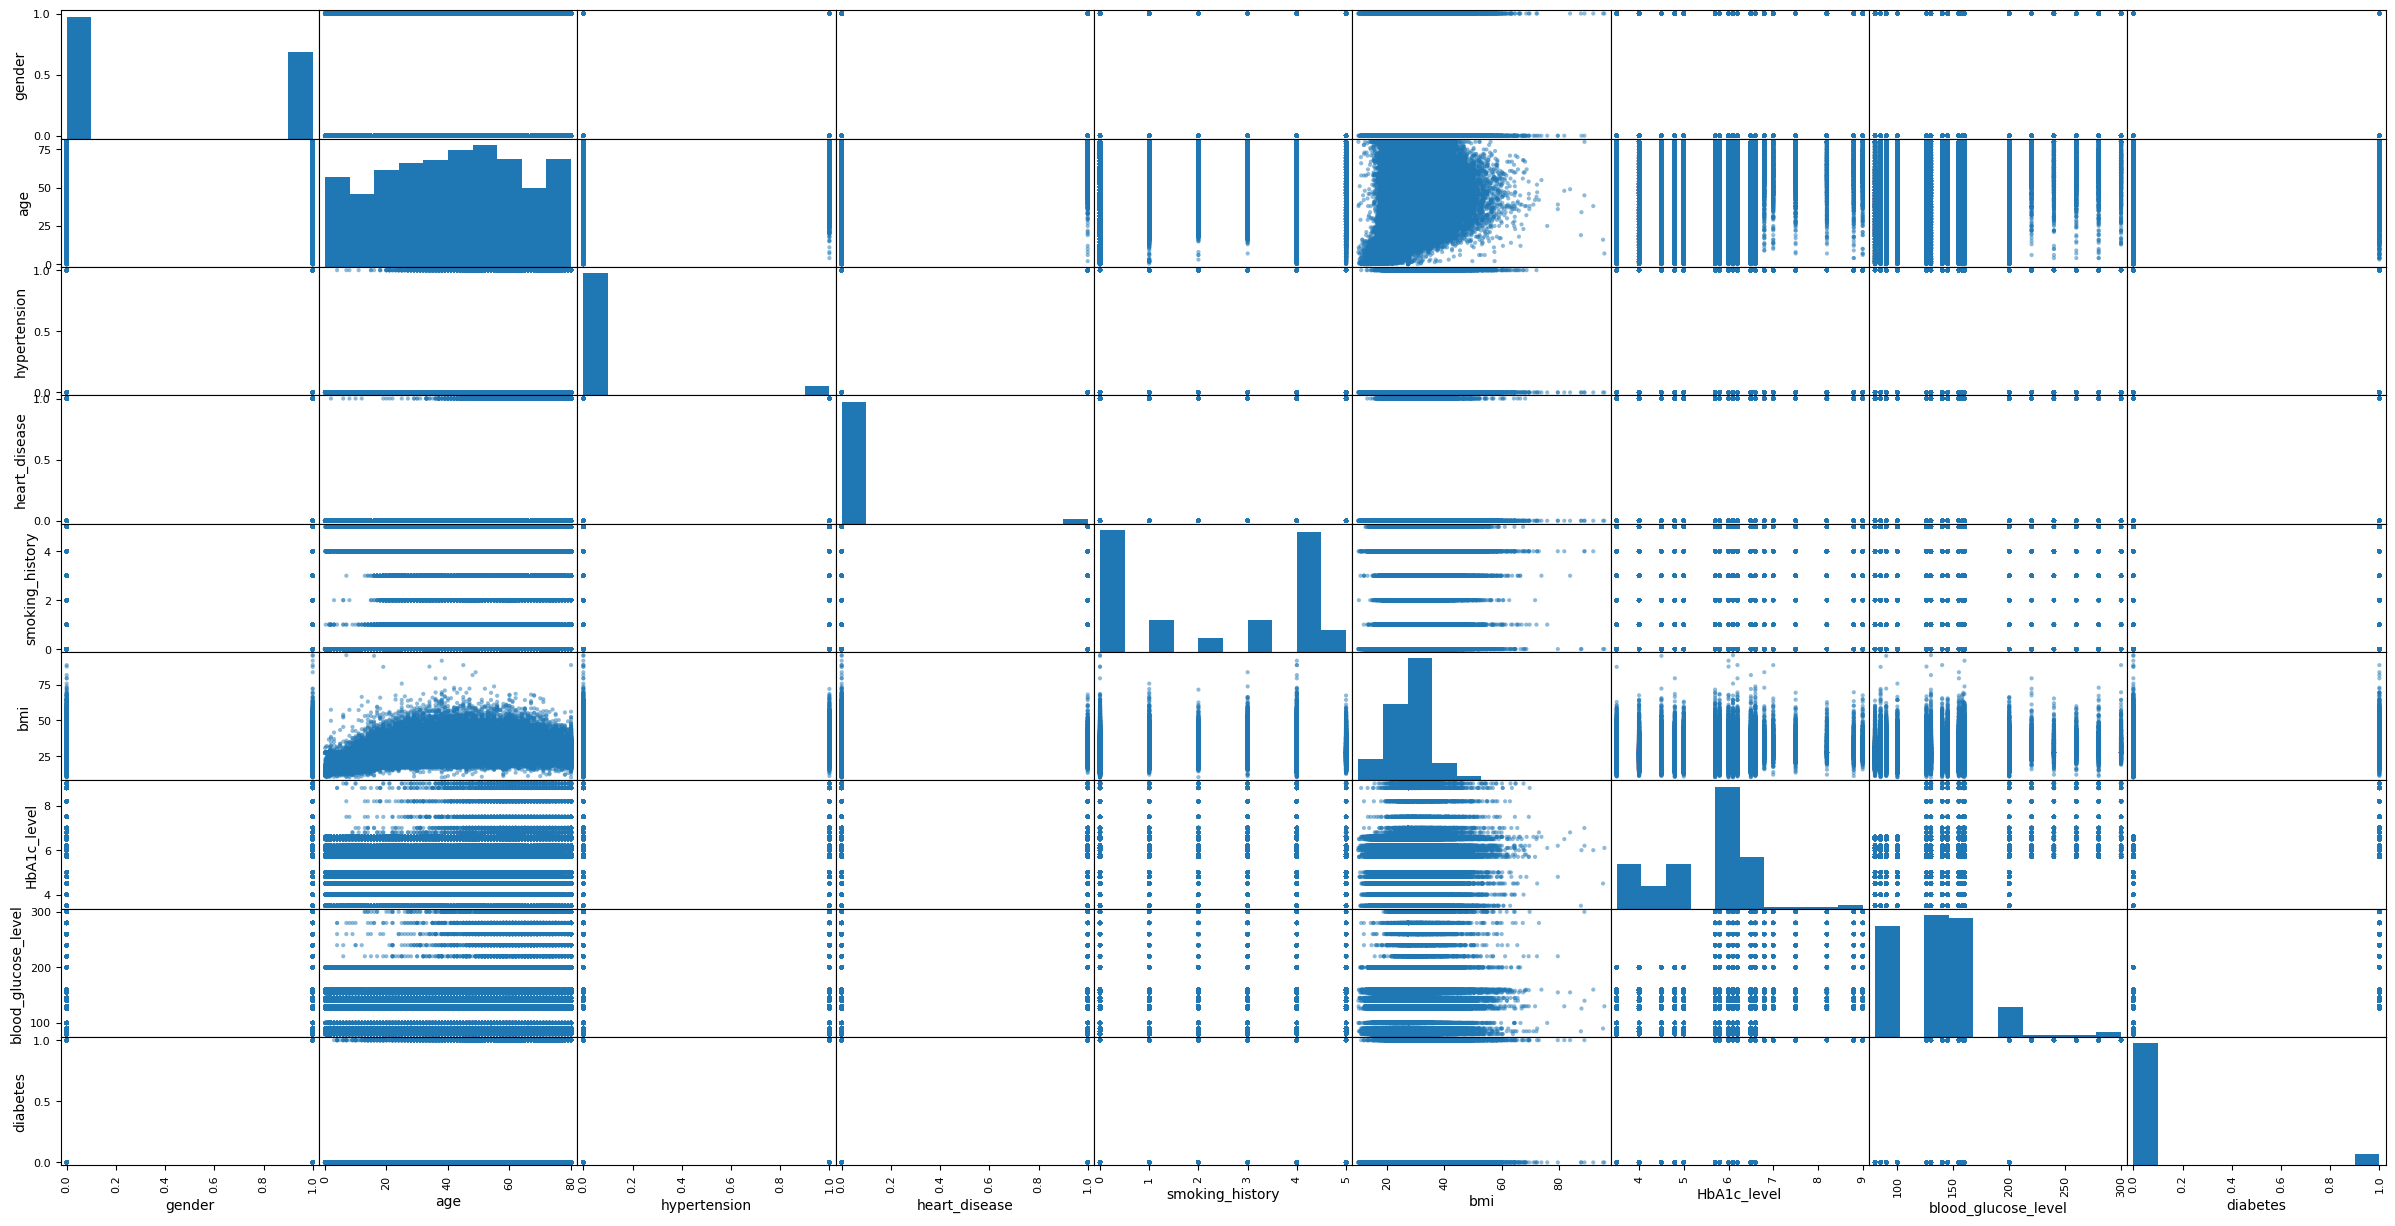

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize=(30,15))

In [64]:
from sklearn.model_selection import train_test_split
dataset = dataset.dropna() #Tirar os NaN (tinha NaN na label de diabetes)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=666)#random_state -> seed

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
x = train_dataset.drop("diabetes", axis=1)
y = train_dataset["diabetes"]
knn_classifier.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [67]:
from sklearn.metrics import accuracy_score
x_test = test_dataset.drop("diabetes", axis=1) #Dataset sem coluna diabetes
y_test = test_dataset["diabetes"]#Apenas coluna diabetes
y_pred = knn_classifier.predict(x_test)

accuracy_score(y_test, y_pred)

0.9507426113917088